In [17]:
import pandas as pd

# Reading Text
reviews_df = pd.read_csv("review_df.csv")
reviews_df.head()

,review_id,rating,comment,is_negative
0,95898001,5,Such a great experience! Everything was wonder...,0
1,95898002,5,The beach was amazing. The hotel was beautiful...,0
2,95898003,5,My family and I will visit again! The staff ma...,0
3,95898004,5,Hands down the best place to be in the summer.,0
4,95898005,1,What a tragedy. The spa staff were so unprofes...,1


In [18]:
reviews_df = reviews_df[["comment", "is_negative"]]
reviews_df.head()

,comment,is_negative
0,Such a great experience! Everything was wonder...,0
1,The beach was amazing. The hotel was beautiful...,0
2,My family and I will visit again! The staff ma...,0
3,Hands down the best place to be in the summer.,0
4,What a tragedy. The spa staff were so unprofes...,1


In [19]:
# Text Cleaner

from nltk.corpus import wordnet

def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

import nltk    
import string
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer

print(stopwords.words('english'))

def clean_text(text):
    # Turn text to Lowercase
    text = text.lower()
    # Removing of Punctuation
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    # Removing numbers
    text = [word for word in text if not any(c.isdigit() for c in word)]
    # Remove stop words
    stop = stopwords.words('english')
    text = [x for x in text if x not in stop]
    # Remove empty tokens
    text = [t for t in text if len(t) > 0]
    # Positioning Tag and Text
    pos_tags = pos_tag(text)
    # Lemmatize text
    text = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
    # remove words with only one letter
    text = [t for t in text if len(t) > 1]
    # Join all text together
    text = " ".join(text)
    return(text)

# clean text data
reviews_df["review_clean"] = reviews_df["comment"].apply(lambda x: clean_text(x))
reviews_df.head()

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

,comment,is_negative,review_clean
0,Such a great experience! Everything was wonder...,0,great experience everything wonderful
1,The beach was amazing. The hotel was beautiful...,0,beach amazing hotel beautiful everything great
2,My family and I will visit again! The staff ma...,0,family visit staff make child felt special
3,Hands down the best place to be in the summer.,0,hand best place summer
4,What a tragedy. The spa staff were so unprofes...,1,tragedy spa staff unprofessional overprice tri...


In [20]:
# Sentiment Intensity
# Adding in the Sentiment Analysis Columns
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()
reviews_df["sentiments"] = reviews_df["comment"].apply(lambda x: sid.polarity_scores(x))
reviews_df = pd.concat([reviews_df.drop(['sentiments'], axis=1), reviews_df['sentiments'].apply(pd.Series)], axis=1)

reviews_df.head()

,comment,is_negative,review_clean,neg,neu,pos,compound
0,Such a great experience! Everything was wonder...,0,great experience everything wonderful,0.00,0.323,0.677,0.8550
1,The beach was amazing. The hotel was beautiful...,0,beach amazing hotel beautiful everything great,0.00,0.427,0.573,0.9200
2,My family and I will visit again! The staff ma...,0,family visit staff make child felt special,0.00,0.761,0.239,0.6218
3,Hands down the best place to be in the summer.,0,hand best place summer,0.00,0.682,0.318,0.6369
4,What a tragedy. The spa staff were so unprofes...,1,tragedy spa staff unprofessional overprice tri...,0.34,0.584,0.077,-0.8031


In [21]:
# add number of characters column
reviews_df["nb_chars"] = reviews_df["comment"].apply(lambda x: len(x))

# add number of words column
reviews_df["nb_words"] = reviews_df["comment"].apply(lambda x: len(x.split(" ")))

reviews_df.head()

,comment,is_negative,review_clean,neg,neu,pos,compound,nb_chars,nb_words
0,Such a great experience! Everything was wonder...,0,great experience everything wonderful,0.00,0.323,0.677,0.8550,50,7
1,The beach was amazing. The hotel was beautiful...,0,beach amazing hotel beautiful everything great,0.00,0.427,0.573,0.9200,72,12
2,My family and I will visit again! The staff ma...,0,family visit staff make child felt special,0.00,0.761,0.239,0.6218,77,15
3,Hands down the best place to be in the summer.,0,hand best place summer,0.00,0.682,0.318,0.6369,47,11
4,What a tragedy. The spa staff were so unprofes...,1,tragedy spa staff unprofessional overprice tri...,0.34,0.584,0.077,-0.8031,126,22


In [22]:
# show distribution of negative to positive reviews
reviews_df["is_negative"].value_counts(normalize = True)

0    0.773629
1    0.226371
Name: is_negative, dtype: float64

In [23]:
# Separates the Negative and Positive Reviews
positive = reviews_df[reviews_df['compound'] >= 0]
negative = reviews_df[reviews_df['compound'] <= 0]

positive.head()

,comment,is_negative,review_clean,neg,neu,pos,compound,nb_chars,nb_words
0,Such a great experience! Everything was wonder...,0,great experience everything wonderful,0.0,0.323,0.677,0.8550,50,7
1,The beach was amazing. The hotel was beautiful...,0,beach amazing hotel beautiful everything great,0.0,0.427,0.573,0.9200,72,12
2,My family and I will visit again! The staff ma...,0,family visit staff make child felt special,0.0,0.761,0.239,0.6218,77,15
3,Hands down the best place to be in the summer.,0,hand best place summer,0.0,0.682,0.318,0.6369,47,11
5,Everything was good. Except for check-in which...,0,everything good except check-in slow everythin...,0.0,0.588,0.412,0.7906,78,12


In [24]:
# Heading of all Negative Reviews
negative.head()

,comment,is_negative,review_clean,neg,neu,pos,compound,nb_chars,nb_words
4,What a tragedy. The spa staff were so unprofes...,1,tragedy spa staff unprofessional overprice tri...,0.340,0.584,0.077,-0.8031,126,22
9,Our room was a mess. It took 40 minutes just t...,1,room mess take minute get housekeep come shodd...,0.116,0.884,0.000,-0.3612,100,22
20,I paid for an ocean view room and I can only s...,1,pay ocean view room see sliver water scam,0.210,0.790,0.000,-0.6114,84,20
21,The food at the restaurant was horrid! I can't...,1,food restaurant horrid can't believe pay sixty...,0.234,0.766,0.000,-0.6688,112,23
29,My room was not cleaned when I entered it. It ...,1,room clean enter smelled rancid,0.259,0.741,0.000,-0.5423,61,12


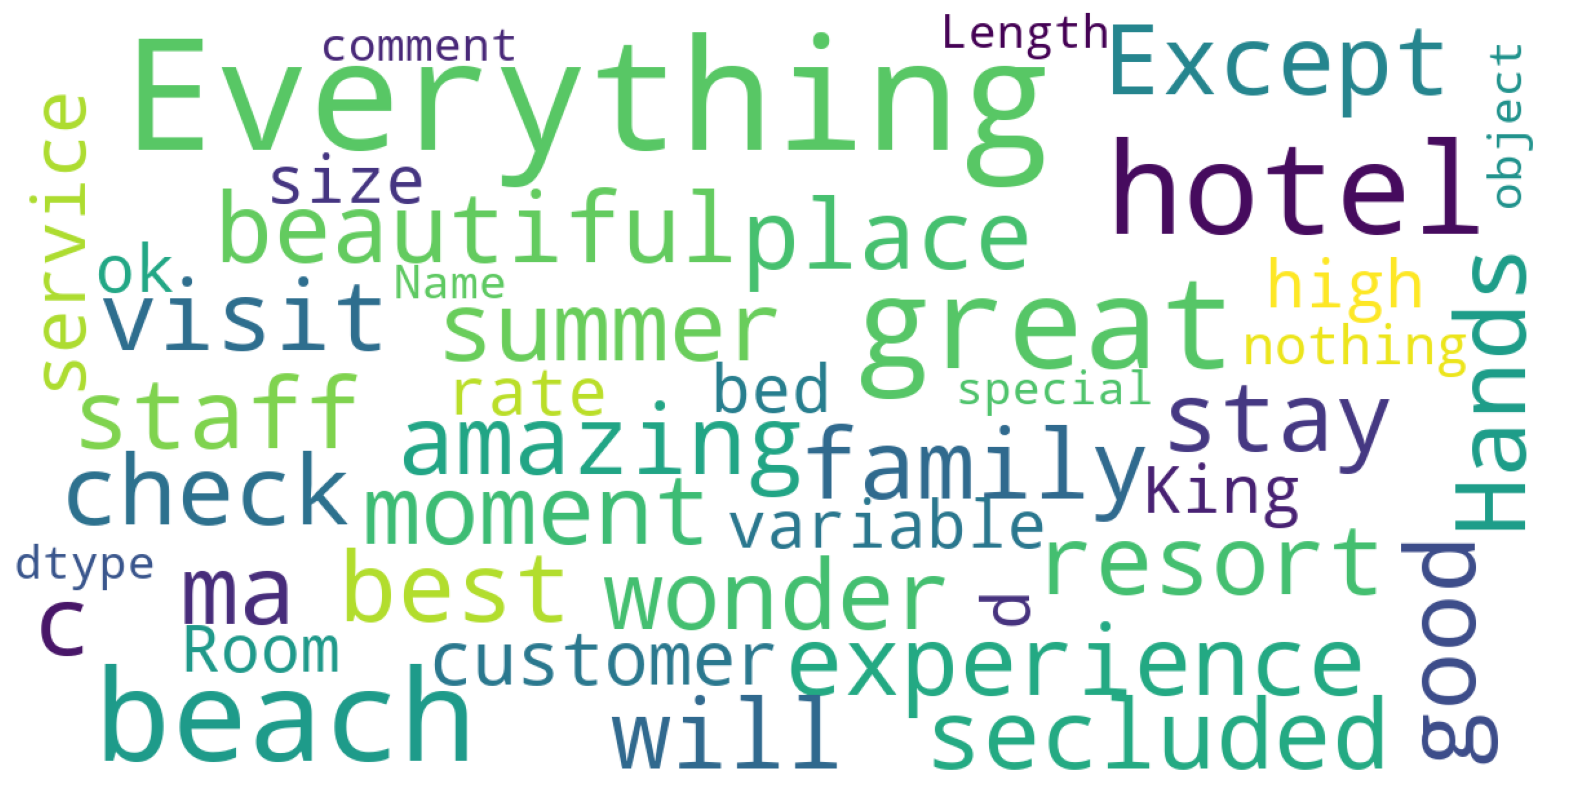

In [25]:
# wordcloud function

from wordcloud import WordCloud
import matplotlib.pyplot as plt

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'white',
        max_words = 200,
        max_font_size = 40, 
        scale = 3,
        random_state = 42
    ).generate(str(data))

    fig = plt.figure(1, figsize = (20, 20))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()
    
# Print Positive Review wordcloud
show_wordcloud(positive["comment"])

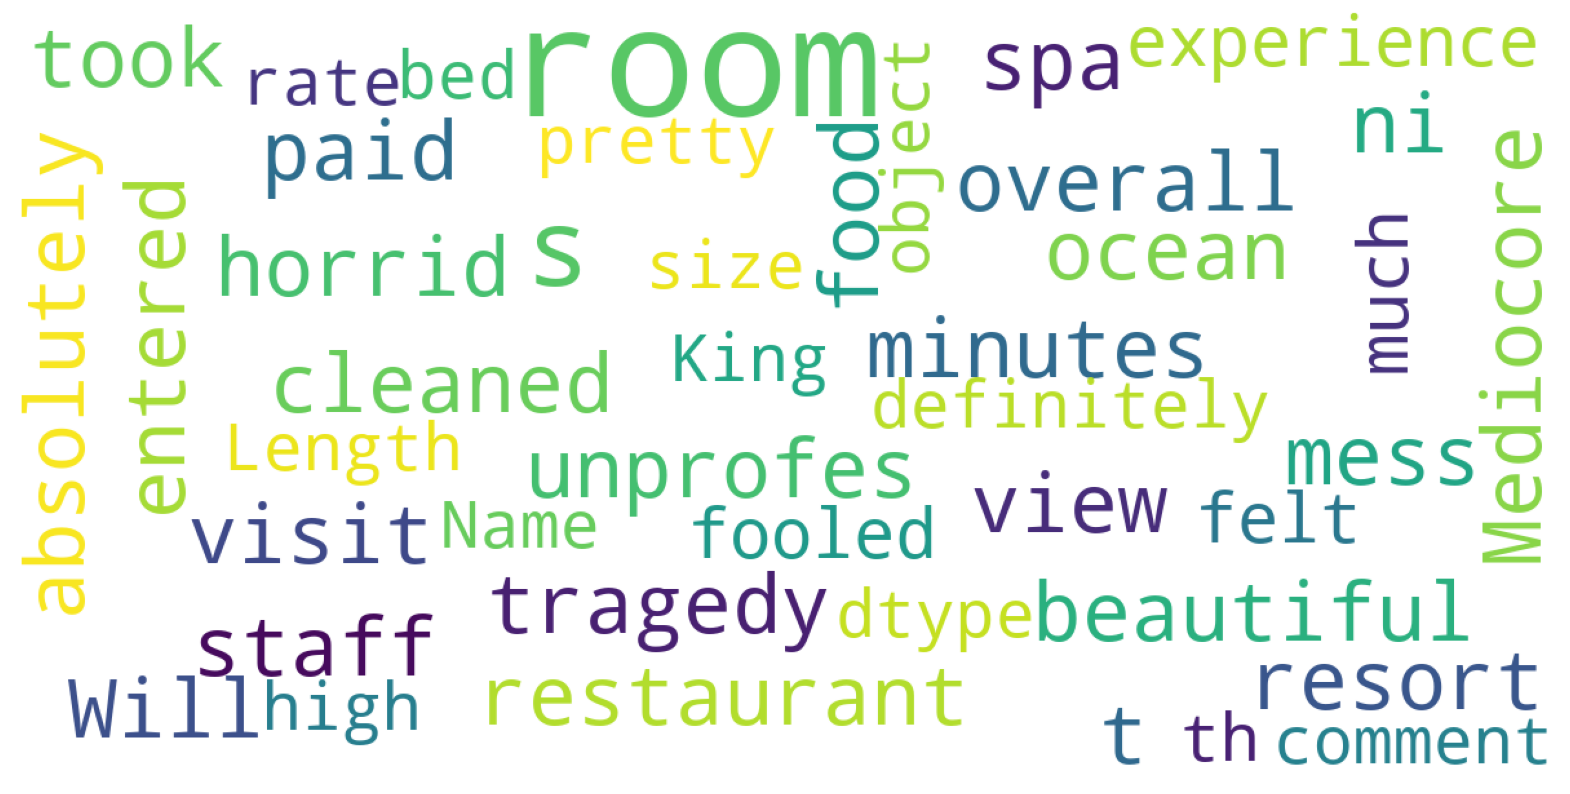

In [26]:
# Negative Review Wordcloud
show_wordcloud(negative["comment"])

In [27]:
# Highest positive sentiment reviews (with more than 5 words)
reviews_df[reviews_df["nb_words"] >= 5].sort_values("pos", ascending = False)[["comment", "pos"]].head(10)

,comment,pos
769,Honestly such a great time!,0.787
235,Honestly such a great time!,0.787
226,"Friendly, helpful staff and comfortable rooms!",0.762
760,"Friendly, helpful staff and comfortable rooms!",0.762
417,Great hotel. Clean and comfortable with a very...,0.727
419,Great looking and clean and friendly! Lovely o...,0.725
588,Good place with great people.,0.700
596,Thank you for everything! Lovely!,0.696
441,Very friendly well staffed. Nice size rooms an...,0.677
0,Such a great experience! Everything was wonder...,0.677


In [28]:
# Lowest negative sentiment reviews (with more than 5 words)
reviews_df[reviews_df["nb_words"] >= 5].sort_values("neg", ascending = False)[["comment", "neg"]].head(10)

,comment,neg
48,"Really great, but not the best value.",0.515
537,"Really great, but not the best value.",0.515
38,The banquet we were supposed to have was ruine...,0.466
84,My TV was broken and the maintenance team was ...,0.429
618,My TV was broken and the maintenance team was ...,0.429
168,Gross and awful. The spa made me so angry and ...,0.408
702,Gross and awful. The spa made me so angry and ...,0.408
511,"Place is so dirty and not well kept, but what ...",0.387
331,The spa is so awful. The water is hard and not...,0.380
143,I feel sick after being here. The outdoor food...,0.354


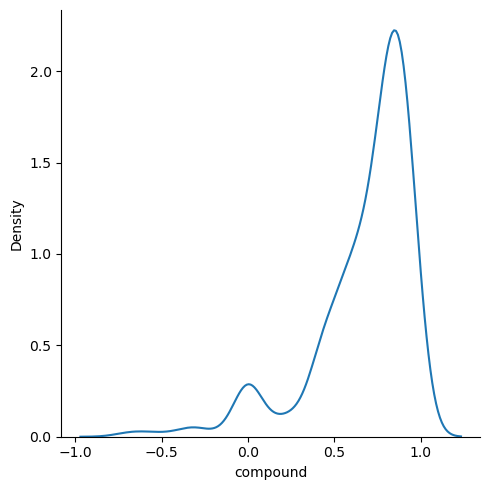

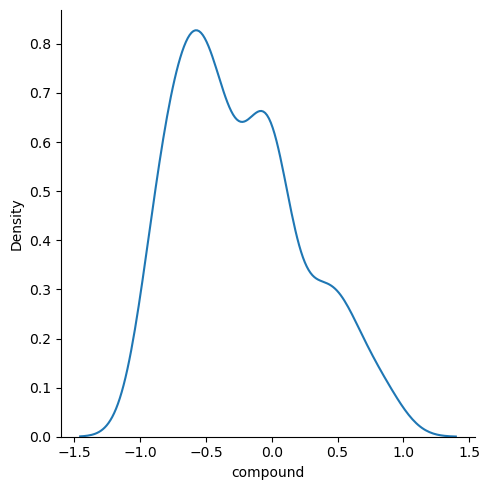

In [29]:
# Plot sentiment distribution for positive and negative reviews

import seaborn as sns

for x in [0, 1]:
    subset = reviews_df[reviews_df['is_negative'] == x]
    
    # Draw the density plot
    if x == 0:
        label = "Good reviews"
    else:
        label = "Bad reviews"
    sns.displot(subset['compound'], label = label, kind="kde")

In [30]:
# Feature selection
label = "is_negative"
ignore_cols = [label, "comment", "review_clean"]
features = [c for c in reviews_df.columns if c not in ignore_cols]

# split the data into train and test
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(reviews_df[features], reviews_df[label], test_size = 0.20, random_state = 42)

In [31]:
# Train a random forest classifier
rf = RandomForestClassifier(n_estimators = 100, random_state = 42)
rf.fit(X_train, y_train)

# show feature importance
feature_importances_df = pd.DataFrame({"feature": features, "importance": rf.feature_importances_}).sort_values("importance", ascending = False)
feature_importances_df.head(20)

,feature,importance
3,compound,0.288264
2,pos,0.233546
0,neg,0.163712
4,nb_chars,0.128062
5,nb_words,0.096036
1,neu,0.090380


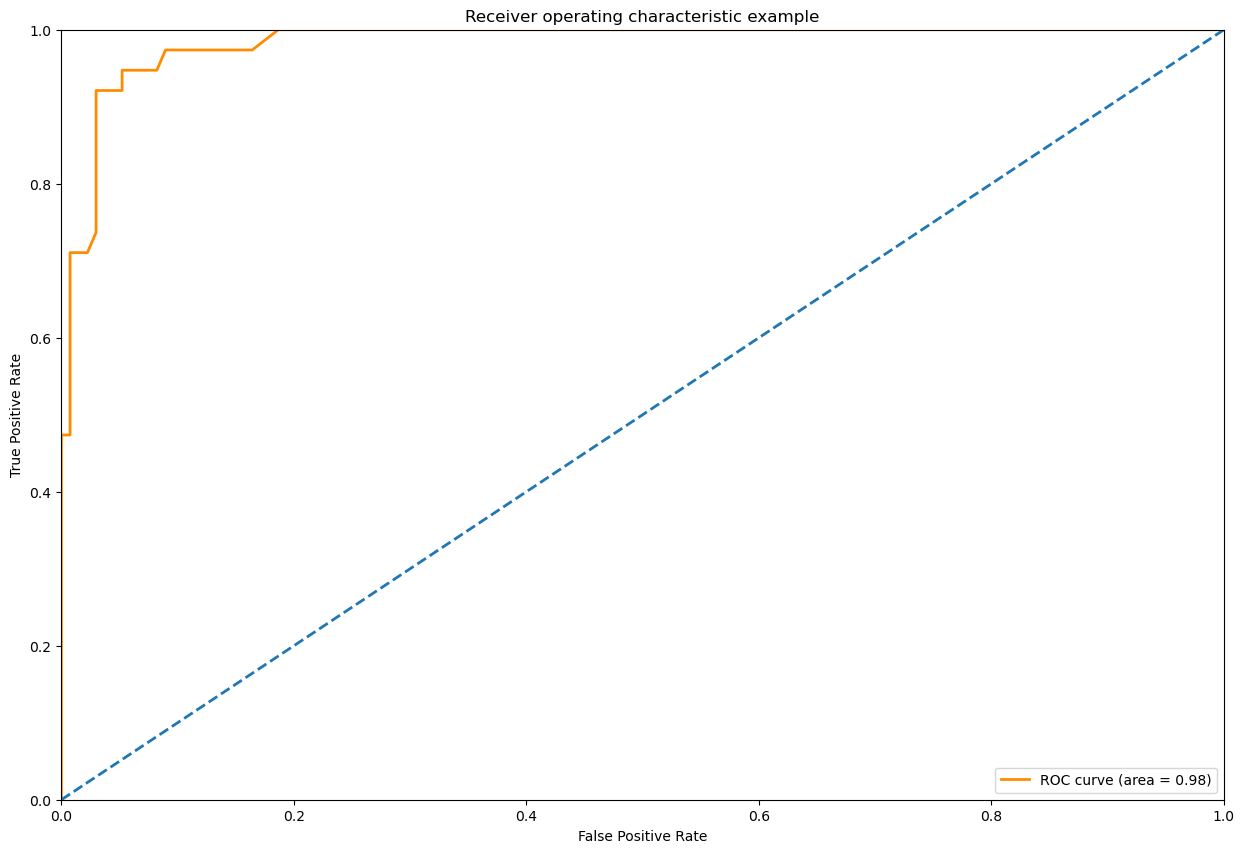

In [33]:
# ROC curve

from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt

y_pred = [x[1] for x in rf.predict_proba(X_test)]
fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label = 1)

roc_auc = auc(fpr, tpr)

plt.figure(1, figsize = (15, 10))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.95')

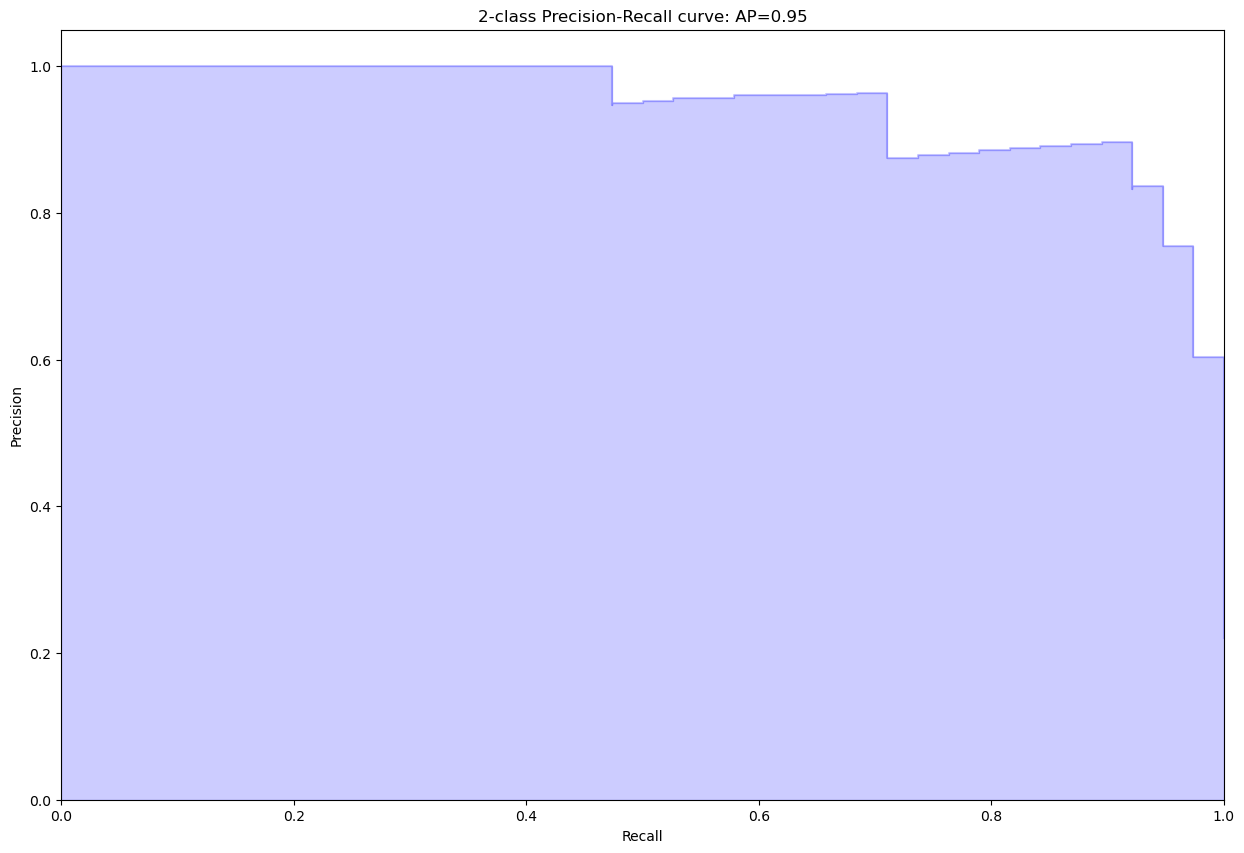

In [34]:
# PR curve

from sklearn.metrics import average_precision_score, precision_recall_curve
from funcsigs import signature

average_precision = average_precision_score(y_test, y_pred)

precision, recall, _ = precision_recall_curve(y_test, y_pred)

# In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})

plt.figure(1, figsize = (15, 10))
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))

In [35]:
reviews_df.head()

,comment,is_negative,review_clean,neg,neu,pos,compound,nb_chars,nb_words
0,Such a great experience! Everything was wonder...,0,great experience everything wonderful,0.00,0.323,0.677,0.8550,50,7
1,The beach was amazing. The hotel was beautiful...,0,beach amazing hotel beautiful everything great,0.00,0.427,0.573,0.9200,72,12
2,My family and I will visit again! The staff ma...,0,family visit staff make child felt special,0.00,0.761,0.239,0.6218,77,15
3,Hands down the best place to be in the summer.,0,hand best place summer,0.00,0.682,0.318,0.6369,47,11
4,What a tragedy. The spa staff were so unprofes...,1,tragedy spa staff unprofessional overprice tri...,0.34,0.584,0.077,-0.8031,126,22
